In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#các thư viện cần thiết
import cv2 as cv
import numpy as np
import os 
import tensorflow as tf
import matplotlib.pyplot as plt
import pickle
import random
from tqdm import tqdm 

[[114 115 113 ... 114 112 126]
 [230 249 248 ... 250 249 247]
 [227 250 244 ... 245 246 254]
 ...
 [242 254 255 ... 254 253 255]
 [213 230 229 ... 229 227 228]
 [ 66  70  66 ...  67  65  69]]


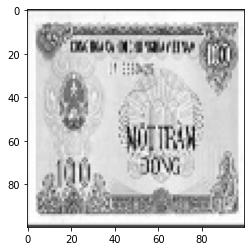

In [ ]:
datadrive = "/content/drive/MyDrive/vietnamesemoney"
phanloai=['100vnd','200vnd','1000vnd','2000vnd','5000vnd','10000vnd','20000vnd','50000vnd','100000vnd','200000vnd','500000vnd']
img_size=100
for doituong in phanloai:
  path=os.path.join(datadrive,doituong)
  for img in os.listdir(path):
    img_array = cv.imread(os.path.join(path,img),cv.IMREAD_GRAYSCALE)
    new_array = cv.resize(img_array,(img_size,img_size))
    print(new_array)
    plt.imshow(new_array,cmap='gray')
    plt.show()
    break
  break

In [ ]:
#tạo dữ liệu để train
training_data=[]
def create_traning_data():

  for doituong in phanloai:
    path = os.path.join(datadrive,doituong)
    class_num = phanloai.index(doituong)

    for img in tqdm(os.listdir(path)): #tqdm hàm thể hiện thanh tiến trình
      try:
        img_array = cv.imread(os.path.join(path,img),cv.IMREAD_GRAYSCALE)
        new_array = cv.resize(img_array,(img_size,img_size))
        training_data.append([new_array,class_num])
      except Exception as e:
        pass
create_traning_data()
print(len(training_data))

100%|██████████| 5/5 [00:01<00:00,  3.92it/s]

49


In [ ]:
#saving (x:picture), (y:label)
x=[]
y=[]
for features, label in training_data :
  x.append(features)
  y.append(label)
x=np.array(x).reshape(-1,img_size,img_size,1)
y=np.array(y)
print('x',x.shape)
print('y',y.shape)

x (49, 100, 100, 1)
y (49,)


In [ ]:
#saving x, y as file.pickle into drive
pickle_out=open("/content/drive/MyDrive/faceid-3-people/save/x.pickle","wb")
pickle.dump(x,pickle_out)
pickle_out.close()

pickle_out=open("/content/drive/MyDrive/faceid-3-people/save/y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [ ]:
pickle_in = open("/content/drive/MyDrive/faceid-3-people/save/x.pickle","rb")
X= pickle.load(pickle_in)

pickle_in = open("/content/drive/MyDrive/faceid-3-people/save/y.pickle","rb")
y= pickle.load(pickle_in)

X=X/255.0
print('X',X.shape)
print('y',y.shape)

X (49, 100, 100, 1)
y (49,)


In [ ]:
#tạo MODEL
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D
from keras.layers.convolutional import MaxPooling2D
from tensorflow.keras.utils import to_categorical

In [ ]:
y= to_categorical(y,11) #phân nhóm theo tính chất


In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(100,100,1)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(11,activation='softmax'))


In [ ]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import SGD,Adam
opt =Adam() #Adam 1 trong những hàm tối ưu hóa cách học trong thư viện 
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(X,y,epochs=100,batch_size=64,validation_split=0.1,verbose=1)

Epoch 1/100
1/1 [==============================] - 4s 4s/step - loss: 2.8870 - accuracy: 0.1136 - val_loss: 13.2934 - val_accuracy: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 3s 3s/step - loss: 7.6898 - accuracy: 0.1136 - val_loss: 9.4666 - val_accuracy: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 3s 3s/step - loss: 5.0252 - accuracy: 0.1136 - val_loss: 4.8524 - val_accuracy: 0.0000e+00
Epoch 4/100
1/1 [==============================] - 3s 3s/step - loss: 3.0321 - accuracy: 0.1364 - val_loss: 2.9819 - val_accuracy: 0.0000e+00
Epoch 5/100
1/1 [==============================] - 3s 3s/step - loss: 2.4265 - accuracy: 0.1136 - val_loss: 3.0924 - val_accuracy: 0.0000e+00
Epoch 6/100
1/1 [==============================] - 3s 3s/step - loss: 2.3029 - accuracy: 0.1591 - val_loss: 3.4226 - val_accuracy: 0.0000e+00
Epoch 7/100
1/1 [==============================] - 3s 3s/step - loss: 2.2865 - accuracy: 0.1364 - val_loss: 3.9728 - val_accuracy: 0.0000e+00
Epoch

In [ ]:
model.save('tienvietnam-19146118.h5')

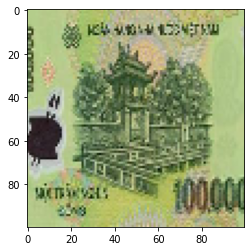

Prediction value 100000vnd


In [ ]:
img_test='/content/100k.jpg'
phanloai=['100vnd','200vnd','1000vnd','2000vnd','5000vnd','10000vnd','20000vnd','50000vnd','100000vnd','200000vnd','500000vnd']

def prepare (filepath):
  img_size=100
  img_array=cv.imread(filepath, cv.IMREAD_GRAYSCALE)
  new_array=cv.resize(img_array,(100,100))
  new_array=new_array/255.0
  return new_array.reshape(-1,100,100,1)
plt.imshow(np.squeeze(prepare(img_test)),cmap='gray')
from keras.preprocessing.image import load_img,img_to_array
img1=load_img(img_test,target_size=(100,100))
img1_tensor=img_to_array(img1)
img1_tensor=np.expand_dims(img1_tensor,axis=0)
img1_tensor /= 255
plt.imshow(np.squeeze(img1_tensor))
plt.show()
prediction=model.predict([prepare(img_test)])
print('Prediction value',phanloai[int(np.argmax(prediction))])